In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [2]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

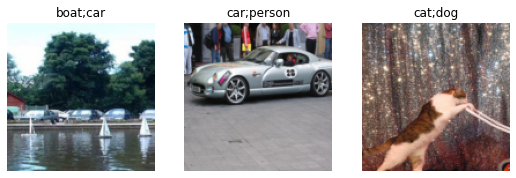

In [11]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [26]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.939897,0.708688,0.226833,00:23
1,0.823407,0.566074,0.292151,00:22
2,0.602166,0.203821,0.820418,00:22
3,0.359144,0.125749,0.939403,00:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.133843,0.120391,0.949681,00:27
1,0.117509,0.107120,0.947669,00:27
2,0.096969,0.102261,0.953068,00:27


In [27]:
preds,targs = learn.get_preds()

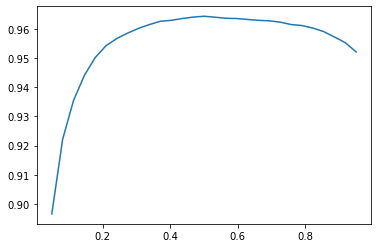

In [28]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [30]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.6))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.940779,0.711231,0.729980,00:25
1,0.823549,0.557787,0.831713,00:23
2,0.605160,0.202854,0.954402,00:22
3,0.361050,0.124618,0.957888,00:22


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.132966,0.120603,0.959403,00:27
1,0.115758,0.109875,0.962291,00:27
2,0.095316,0.105536,0.963147,00:27
